In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [40]:
from __future__ import print_function
!pip install keract
!pip install utils
import os
from glob import glob

import keras
import keract
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.datasets import mnist


class MNIST:
    # input image dimensions
    img_rows, img_cols = 28, 28
    input_shape = (img_rows, img_cols, 1)
    num_classes = 10


    def get_mnist_data():
   
        (x_train, y_train), (x_test, y_test) = mnist.load_data()

        x_train = x_train.reshape(x_train.shape[0], MNIST.img_rows, MNIST.img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], MNIST.img_rows, MNIST.img_cols, 1)

        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255
        print('x_train shape:', x_train.shape)
        print(x_train.shape[0], 'train samples')
        print(x_test.shape[0], 'test samples')

        # convert class vectors to binary class matrices
        y_train = keras.utils.to_categorical(y_train, MNIST.num_classes)
        y_test = keras.utils.to_categorical(y_test, MNIST.num_classes)
        return x_train, y_train, x_test, y_test


x_train, y_train, x_test, y_test = MNIST.get_mnist_data()
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                         activation='relu',
                         input_shape=MNIST.input_shape))
        
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(MNIST.num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


model.fit(x_train, y_train,
          batch_size=64,
          validation_split=0.20,
          epochs=15,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 149s 2ms/step - loss: 0.2326 - accuracy: 0.9290 - val_loss: 0.0605 - val_accuracy: 0.9797
Epoch 2/15
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0924 - accuracy: 0.9726 - val_loss: 0.0433 - val_accuracy: 0.9847
Epoch 3/15
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0695 - accuracy: 0.9792 - val_loss: 0.0543 - val_accuracy: 0.9827
Epoch 4/15
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0573 - accuracy: 0.9830 - val_loss: 0.0354 - val_accuracy: 0.9887
Epoch 5/15
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0512 - accuracy: 0.9839 - val_loss: 0.0321 - val_accuracy: 0.9895
Epoch 6/15
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0471 - accuracy: 0.9867 - val_loss: 0.0348 - val_accura

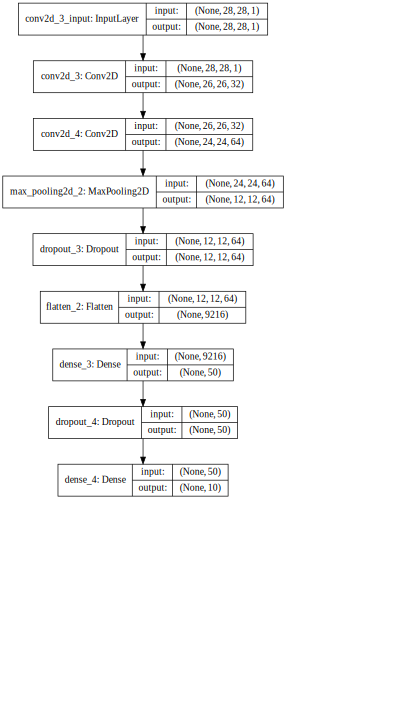

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, 
                 show_layer_names=True, rankdir='TB',dpi=50).create(prog='dot', format='svg'))

In [5]:
image_index=1

import numpy as np

test_image =np.expand_dims(x_test[image_index], axis=0)
test_image.shape

model.predict_proba(test_image,batch_size=1)



array([[1.06518094e-07, 2.33915671e-07, 9.99999642e-01, 5.41688383e-09,
        5.86455662e-10, 1.80580865e-12, 1.05013545e-08, 3.21143045e-09,
        9.17878107e-10, 5.55354374e-13]], dtype=float32)

In [0]:
def get_activations(model, model_inputs, print_shape_only=True, layer_name=None):
    import keras.backend as K
    print('----- activations -----')
    activations = []
    inp = model.input

    model_multi_inputs_cond = True
    if not isinstance(inp, list):
        
        inp = [inp]
        model_multi_inputs_cond = False

    outputs = [layer.output for layer in model.layers if
               layer.name == layer_name or layer_name is None]  
    #print("the outputs of the layer is {}".format(outputs))
    funcs = [K.function(inp + [K.learning_phase()], [out]) for out in outputs]  

    if model_multi_inputs_cond:
        list_inputs = []
        list_inputs.extend(model_inputs)
        list_inputs.append(1.)
    else:
        list_inputs = [model_inputs, 1.]

    layer_outputs = [func([model_inputs, 1.])[0] for func in funcs]
    layer_outputs = [func(list_inputs)[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if print_shape_only:
            print(layer_activations.shape)
        else:
            print(layer_activations)
    return activations

In [0]:
def display_activations(activation_maps):
    import numpy as np
    import matplotlib.pyplot as plt
 
    batch_size = activation_maps[0].shape[0]
    assert batch_size == 1, 'One image at a time to visualize.'
    for i, activation_map in enumerate(activation_maps):
        print('Displaying activation map {}'.format(i))
        shape = activation_map.shape
        if len(shape) == 4:
            activations = np.hstack(np.transpose(activation_map[0], (2, 0, 1)))
            #print("The activations for the layer is {}".format(activations))
        elif len(shape) == 2:
            # try to make it square as much as possible. we can skip some activations.
            activations = activation_map[0]
            if i==6:
              

            print("The activations for the layer is {}".format(activations))
            num_activations = len(activations)
            if num_activations > 1024:  # too hard to display it on the screen.
                square_param = int(np.floor(np.sqrt(num_activations)))
                activations = activations[0: square_param * square_param]
                activations = np.reshape(activations, (square_param, square_param))
            else:
                activations = np.expand_dims(activations, axis=0)
        else:
            raise Exception('len(shape) = 3 has not been implemented.')
        

        fig, ax = plt.subplots(figsize=(18, 12))
        ax.imshow(activations, interpolation='None', cmap='binary')
        plt.show()       

In [0]:
def img_samenum(x_test,y_test,number):

  """
  retrieve images of same digit and reshape
  """

  x_test_2=[x_test[y_test==number]]

  x_test_2array=np.array(x_test_2[0],dtype='float')
  print(x_test_2array.shape)

  x_test_img=x_test_2array.reshape(x_test_2array.shape[0],28,28,1)
  print(x_test_img.shape)
  return x_test_img


In [0]:
import numpy as np
def test_image(test_input,image_index):
  """
  pass the image to predict the probilities and get the final shape
  """

  image =np.expand_dims(test_input[image_index], axis=0)
  #print(test_image.shape)

  print(model.predict_proba(image,batch_size=1))
  print(image.shape)
  activations_0=get_activations(model,image)
  display_activations(activations_0)

In [13]:
#loading fresh test dataset from MNIST

(x_train_filter, y_train_filter), (x_test_filter, y_test_filter) = mnist.load_data()

x_test_filter.shape[0]

10000

In [27]:
#retrieveing images for num 0

x_test_img=img_samenum(x_test_filter,y_test_filter,0)

(980, 28, 28)
(980, 28, 28, 1)


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 50)
(1, 50)
(1, 10)
Displaying activation map 0


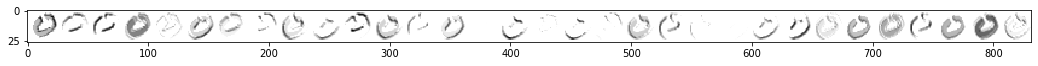

Displaying activation map 1


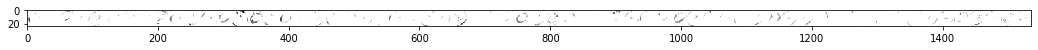

Displaying activation map 2


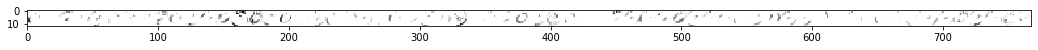

Displaying activation map 3


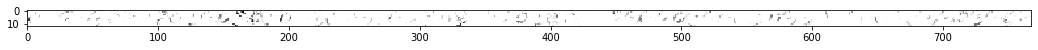

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


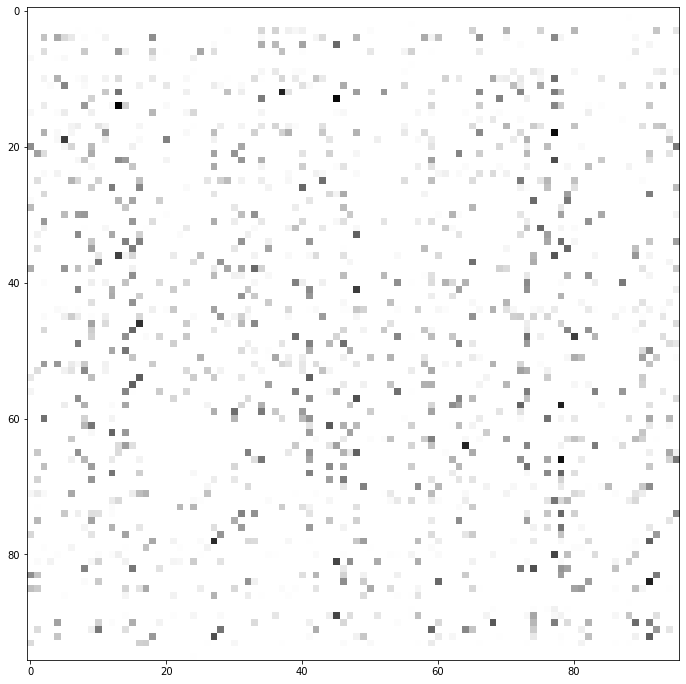

Displaying activation map 5
The activations for the layer is [2405.8198  1993.1128   610.1719   459.73605 1776.1257  1540.4926
 2391.5952  1292.0243  2604.1814  1653.0542   266.55133 1168.9645
  498.1211   901.2751  2337.89    3318.5383  2472.2632  1344.3967
 3066.0852  1518.5073   495.8802   837.6203  1648.0286  2972.8755
 2481.8628   635.0343   928.78217 2298.963   1536.7704  2770.8965
  607.6156  1245.204    587.86694    0.      1733.0145   390.57126
    0.      2573.5251  2848.9294  3411.8062   824.5432   692.42725
  636.6384  2210.2195  2817.5608  3724.2456   942.81006  764.9236
  354.42276 2736.5376 ]


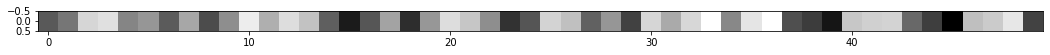

Displaying activation map 6
The activations for the layer is [4485.513   3744.9612  1082.6296     0.      3002.0044  2701.4695
    0.         0.      4839.803      0.       423.07913 2107.922
  798.5758     0.      4355.3804     0.      4341.738   2130.5588
 5667.444      0.      1094.3945     0.         0.         0.
    0.      1264.0671     0.         0.      2748.2473     0.
    0.         0.      1072.112      0.      3401.535    740.9431
    0.         0.      5272.144      0.      1278.361   1634.0238
    0.      4108.51    5048.0845  7204.608      0.         0.
  630.0137     0.     ]


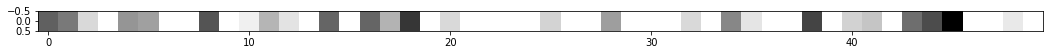

Displaying activation map 7
The activations for the layer is [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


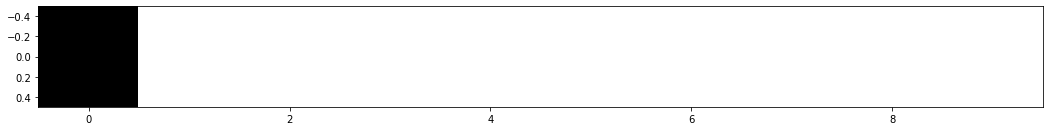

In [39]:
#first image of 0

test_image(x_test_img,3)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 50)
(1, 50)
(1, 10)
Displaying activation map 0


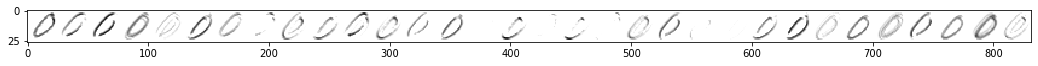

Displaying activation map 1


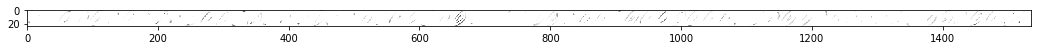

Displaying activation map 2


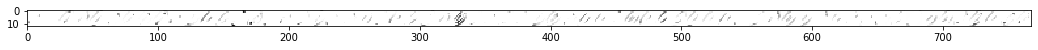

Displaying activation map 3


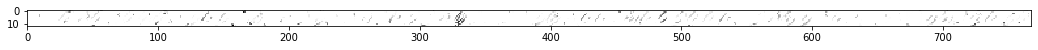

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


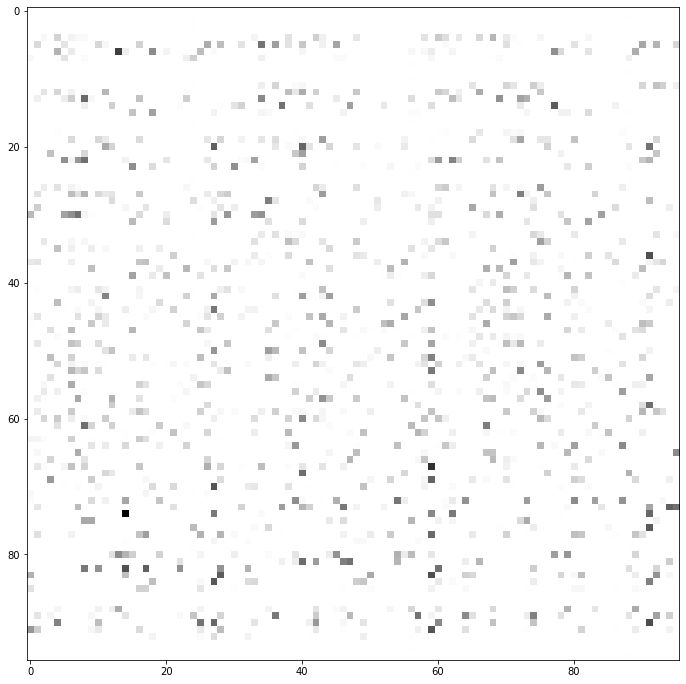

Displaying activation map 5
The activations for the layer is [2382.4229  1491.3883   430.5565    84.28605 1375.5964   800.2453
 2722.2766  1499.0564  2147.016    925.71124  370.2317  1137.9625
  381.53607  816.58325  762.78485 2885.3608  2515.228    644.68054
 2839.9204  1054.8495   600.5668   578.12054 1489.6055  2277.9783
 1928.1987   100.88402  617.8505  2392.8662   979.0343  2191.1348
  954.59155 1368.0834   306.92557    0.      1396.4775   452.02094
    0.      1424.2185  2471.8809  2858.1687   598.3086   353.34363
  515.17926 1565.0646  3375.5728  3233.4983   829.88306  850.32825
  934.99805 2650.518  ]


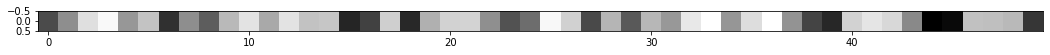

Displaying activation map 6
The activations for the layer is [4465.2876  2654.632   1130.7009     0.      2285.3599     0.
 5002.7627     0.      3571.1387  1434.071    817.9712     0.
    0.         0.         0.         0.      4363.2573     0.
    0.         0.      1111.3513  1711.8895  2735.5488  4033.8462
    0.         0.         0.         0.         0.         0.
    0.      2997.1897     0.         0.         0.       692.1013
    0.         0.      4529.4165  5468.866   1338.9014    33.51431
  706.5834     0.      6031.315      0.         0.      1293.6256
 1761.3717  4564.7773 ]


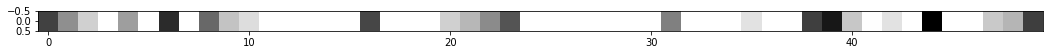

Displaying activation map 7
The activations for the layer is [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


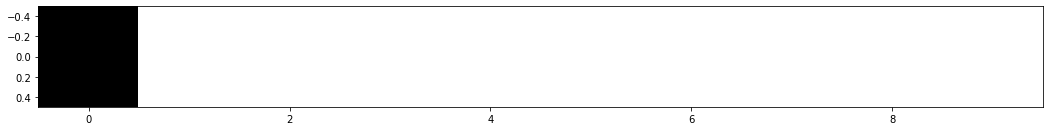

In [37]:
#second image of zero

test_image(x_test_img,15)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 50)
(1, 50)
(1, 10)
Displaying activation map 0


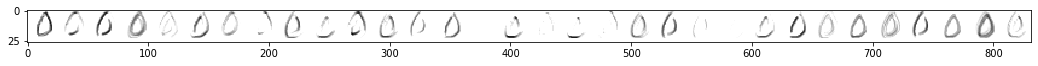

Displaying activation map 1


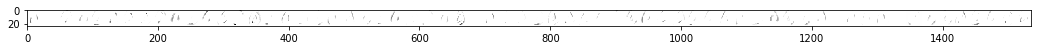

Displaying activation map 2


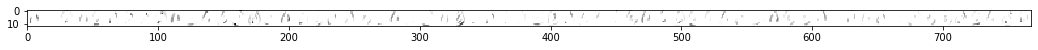

Displaying activation map 3


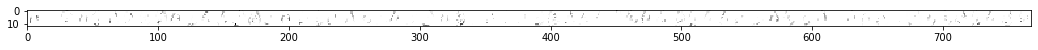

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


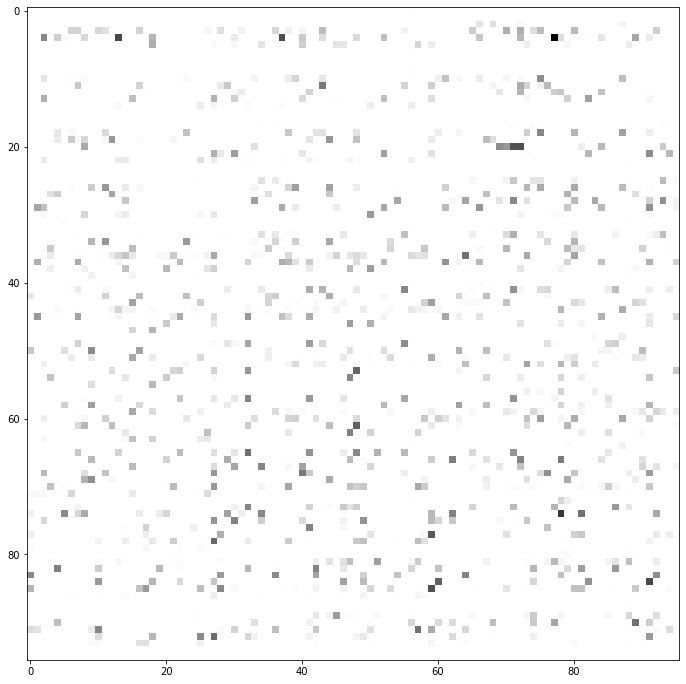

Displaying activation map 5
The activations for the layer is [2645.7026  2049.899   1161.266    458.2203  1651.234   1293.865
 2900.8826  1592.4131  2430.9868  1549.3295   501.75903 1754.9891
  314.75955 1259.9723  1891.3544  2967.7231  2630.8723  1304.956
 3198.6584  2169.0515  1059.1766   412.1175  2070.112   3081.32
 2362.3093   602.55963 1007.0524  2688.0876  1233.7992  2710.1868
  838.1867  1536.8367  1110.1251   179.29968 2126.1763   563.8717
    0.      2486.0347  2993.1821  3072.4973  1288.8721   488.35278
  446.57547 2110.109   2928.4697  3731.6458  1472.5212  1008.707
  804.8614  2680.3708 ]


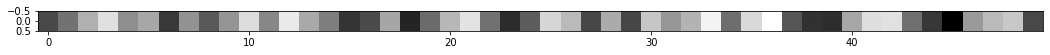

Displaying activation map 6
The activations for the layer is [   0.         0.      1983.621      0.         0.         0.
 5113.865   2792.6162     0.         0.       818.2562     0.
  833.1525  2549.7678     0.         0.         0.      2158.52
    0.      4134.3955  1995.2638   818.0907  3487.3271     0.
    0.      1053.5359  1773.1804     0.      2100.129      0.
 1302.7053     0.         0.       144.37085 3428.877      0.
    0.      4718.585   4986.959      0.      2126.3865   657.6265
    0.      3844.177   4876.79       0.      3061.8154  1918.4594
 1350.5262  4514.6973 ]


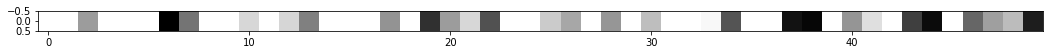

Displaying activation map 7
The activations for the layer is [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


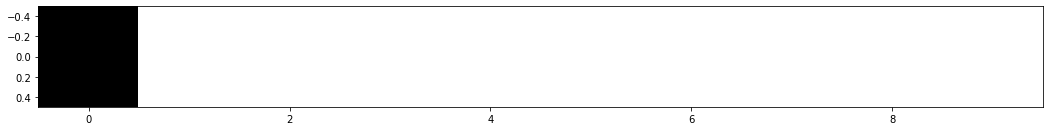

In [38]:
#third image of 0

test_image(x_test_img,555)